In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import networkx as nx
import seaborn as sns

C:\Users\PROF\AppData\Roaming\Python\Python311\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


In [2]:
data=pd.read_csv('data1.csv')

In [4]:
data

,Unnamed: 0,director_name,actor_1_name,actor_2_name,actor_3_name,genres,movie_title,rating,vote_count,id,imdb_id,release_date,revenue,runtime,comb,release_year,user_ids
0,0,James Cameron,CCH Pounder,Joel David Moore,Wes Studi,Action Adventure Fantasy Sci-Fi,avatar,7.580,30694.0,19995.0,tt0499549,2009-12-15,"2,923,706,026",162.0,James Cameron CCH Pounder Joel David Moore Wes...,2009.0,"['daisyrowley', 'John Chard', 'msbreviews', 't..."
1,1,Gore Verbinski,Johnny Depp,Orlando Bloom,Jack Davenport,Action Adventure Fantasy,pirates of the caribbean: at world's end,7.252,13782.0,285.0,tt0449088,2007-05-19,"961,000,000",169.0,Gore Verbinski Johnny Depp Orlando Bloom Jack ...,2007.0,"['SoSmooth1982', 'Geronimo1967']"
2,2,Sam Mendes,Christoph Waltz,Rory Kinnear,Stephanie Sigman,Action Adventure Thriller,spectre,6.540,10173.0,206647.0,tt2379713,2015-10-26,"880,674,609",148.0,Sam Mendes Christoph Waltz Rory Kinnear Stepha...,2015.0,"['cutprintchris', 'Frank Ochieng', 'tanty', 'R..."
3,3,Christopher Nolan,Tom Hardy,Christian Bale,Joseph Gordon-Levitt,Action Thriller,the dark knight rises,7.778,21975.0,49026.0,tt1345836,2012-07-17,"1,081,041,287",165.0,Christopher Nolan Tom Hardy Christian Bale Jos...,2012.0,"['travisbell', 'Chris!', 'GeekMasher', 'Im_Inf..."
4,4,Doug Walker,Doug Walker,Rob Walker,unknown,Documentary,star wars: episode vii - the force awakens ...,7.285,18821.0,140607.0,tt2488496,2015-12-15,"2,068,223,624",136.0,Doug Walker Doug Walker Rob Walker unknown Doc...,2015.0,"['Frank Ochieng', 'bodokh', 'John Chard', 'Bul..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7240,7240,Ryan Martin Brown,Colin Burgess,Rajat Suresh,Holmes,Comedy,free time,0.000,0.0,1063679.0,tt24806518,2024-03-22,0,78.0,Ryan Martin Brown Colin Burgess Rajat Suresh H...,2024.0,[]
7241,7241,Adam Wingard,Rebecca Hall,Brian Tyree Henry,Dan Stevens,"Action, Science Fiction, Adventure",godzilla x kong: the new empire,6.716,433.0,823464.0,tt14539740,2024-03-27,"214,305,986",115.0,Adam Wingard Rebecca Hall Brian Tyree Henry Da...,2024.0,"['msbreviews', 'Geronimo1967']"
7242,7242,Jean-Stéphane Sauvaire,Tye Sheridan,Sean Penn,Katherine Waterston,"Drama, Thriller",asphalt city,6.200,5.0,628922.0,tt9663896,2024-03-28,0,120.0,Jean-Stéphane Sauvaire Tye Sheridan Sean Penn ...,2024.0,['lachlanthiele']
7243,7243,Steve Buscemi,Steve Buscemi (director); Alessandro Camon (sc...,unknown,unknown,Drama,the listener,1.000,1.0,914243.0,tt15669314,2024-03-29,0,96.0,Steve Buscemi Steve Buscemi (director); Alessa...,2024.0,[]


In [5]:
data.columns

Index(['Unnamed: 0', 'director_name', 'actor_1_name', 'actor_2_name',
       'actor_3_name', 'genres', 'movie_title', 'rating', 'vote_count', 'id',
       'imdb_id', 'release_date', 'revenue', 'runtime', 'comb', 'release_year',
       'user_ids'],
      dtype='object')

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7245 entries, 0 to 7244
Data columns (total 17 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Unnamed: 0     7245 non-null   int64  
 1   director_name  7245 non-null   object 
 2   actor_1_name   7245 non-null   object 
 3   actor_2_name   7245 non-null   object 
 4   actor_3_name   7245 non-null   object 
 5   genres         7245 non-null   object 
 6   movie_title    7245 non-null   object 
 7   rating         7245 non-null   float64
 8   vote_count     7245 non-null   float64
 9   id             7245 non-null   float64
 10  imdb_id        5483 non-null   object 
 11  release_date   5494 non-null   object 
 12  revenue        5498 non-null   object 
 13  runtime        5498 non-null   float64
 14  comb           7245 non-null   object 
 15  release_year   5494 non-null   float64
 16  user_ids       7216 non-null   object 
dtypes: float64(5), int64(1), object(11)
memory usage: 96

## Top 10

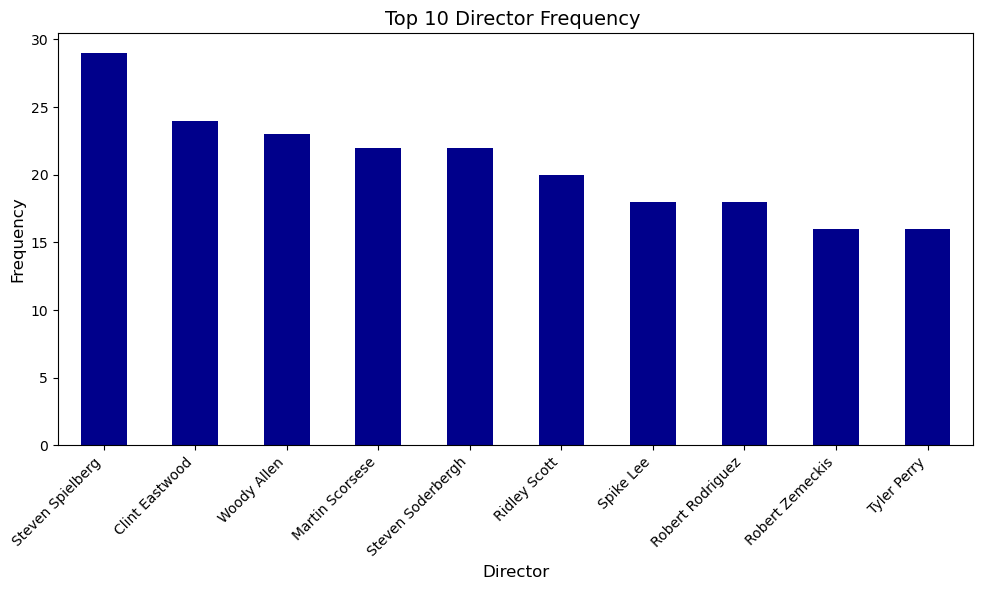

In [7]:
# Assuming 'data' is your DataFrame
filtered_data = data[data['director_name'] != 'unknown']
director_frequency = filtered_data['director_name'].value_counts().head(10) 
plt.figure(figsize=(10, 6)) 
director_frequency.plot(kind='bar', color='darkblue')  
plt.xlabel('Director', fontsize=12)  
plt.ylabel('Frequency', fontsize=12)  
plt.title('Top 10 Director Frequency ', fontsize=14)  
plt.xticks(rotation=45, ha='right')  
plt.tight_layout()  
plt.show()

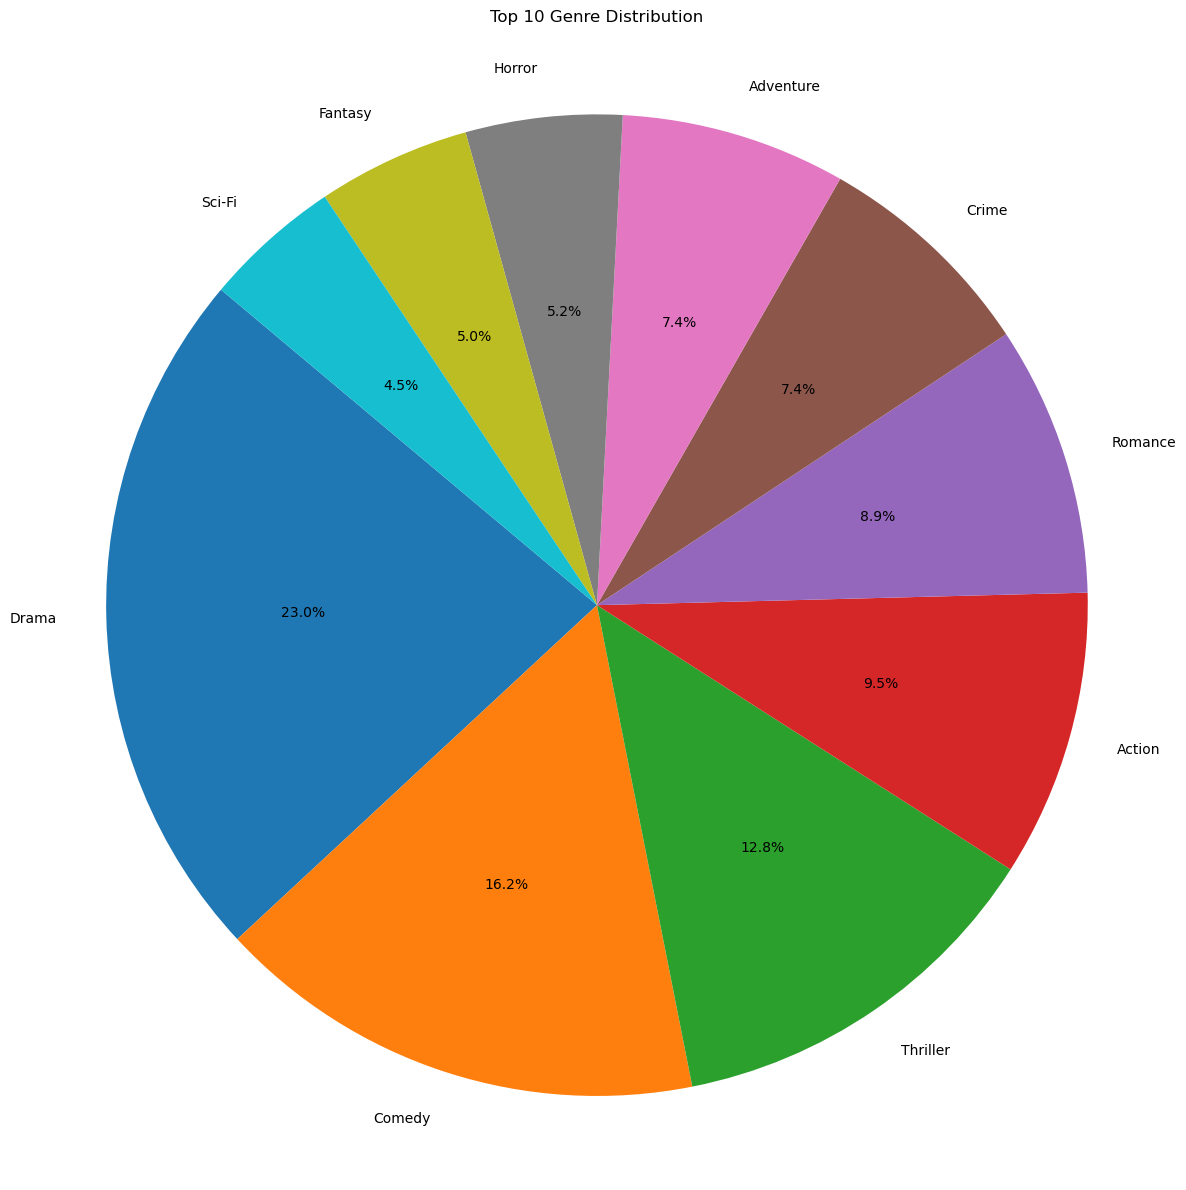

In [8]:
genre_counts = {}


for index, row in data.iterrows():
    genres = row['genres'].split() 
    for genre in genres:
        if genre in genre_counts:
            genre_counts[genre] += 1
        else:
            genre_counts[genre] = 1


genre_distribution = pd.DataFrame(list(genre_counts.items()), columns=['Genre', 'Frequency'])

# Sorting the genre distribution DataFrame by frequency
genre_distribution.sort_values(by='Frequency', ascending=False, inplace=True)

# Selecting only the top 10 most frequent genres
top_genres = genre_distribution.head(10)

# Plotting the pie chart
plt.figure(figsize=(12, 12))  # Adjust the figure size
plt.pie(top_genres['Frequency'], labels=top_genres['Genre'], autopct='%1.1f%%', startangle=140)
plt.title('Top 10 Genre Distribution')
plt.axis('equal')  
plt.tight_layout()  
plt.show()

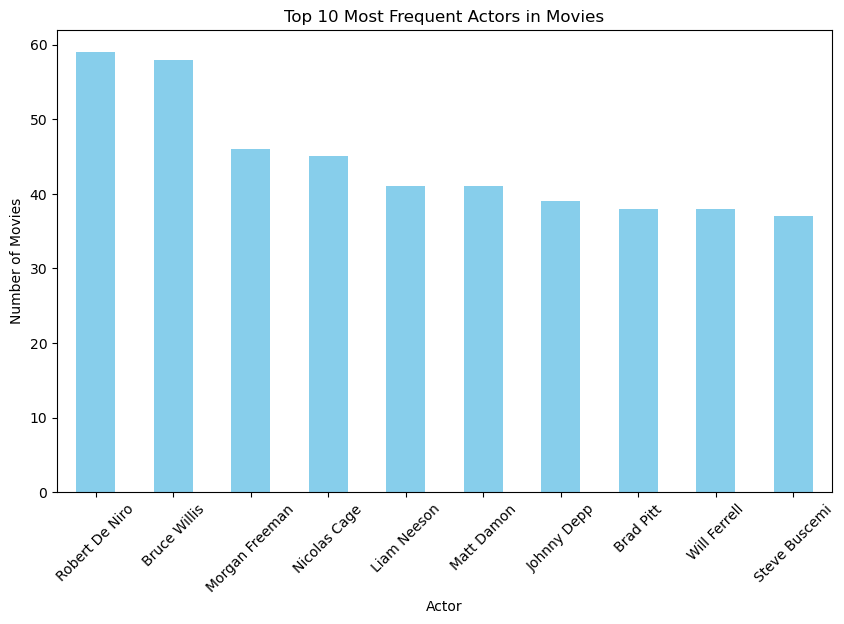

In [14]:
# Filter out unknown actors
data = data[(data['actor_1_name'].str.lower() != 'unknown') & 
            (data['actor_2_name'].str.lower() != 'unknown') & 
            (data['actor_3_name'].str.lower() != 'unknown')]

# Calculate the total number of movies each actor has appeared in
actor_movie_counts = data['actor_1_name'].value_counts().add(data['actor_2_name'].value_counts(), fill_value=0) \
                                                     .add(data['actor_3_name'].value_counts(), fill_value=0)

# Select the top 10 most frequent actors
top_10_actors = actor_movie_counts.nlargest(10)

# Plotting the bar chart
plt.figure(figsize=(10, 6))
top_10_actors.plot(kind='bar', color='skyblue')
plt.title('Top 10 Most Frequent Actors in Movies')
plt.xlabel('Actor')
plt.ylabel('Number of Movies')
plt.xticks(rotation=45)
plt.show()


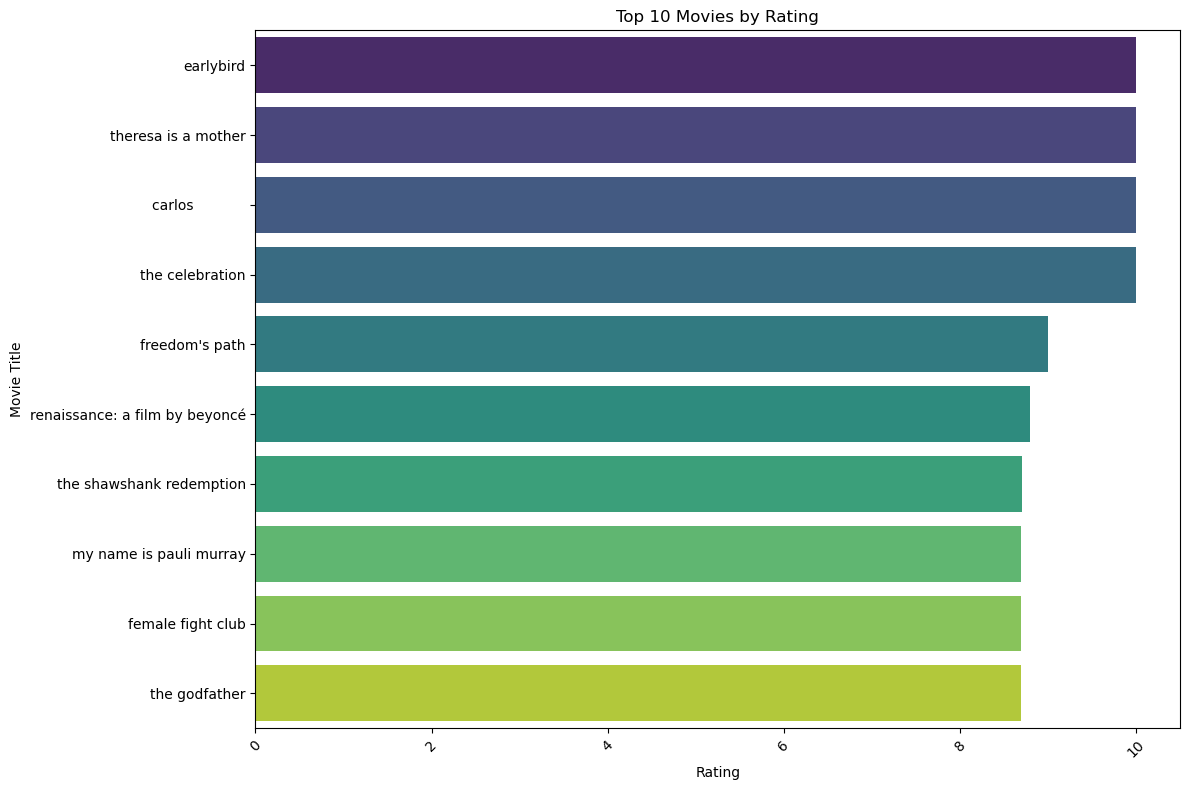

In [16]:


# Sort DataFrame by 'rating' in descending order and select top 10 movies
top_10_movies_by_rating = data.sort_values(by='rating', ascending=False).head(10)

# Plotting the top 10 movies by rating
plt.figure(figsize=(12, 8))
sns.barplot(x='rating', y='movie_title', data=top_10_movies_by_rating, palette='viridis')
plt.title('Top 10 Movies by Rating')
plt.xlabel('Rating')
plt.ylabel('Movie Title')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [18]:
import plotly.express as px
top10long= data.sort_values(by='runtime',ascending=False).head(10)[['movie_title','runtime']]
fig=px.bar(top10long,x='movie_title',y='runtime',color='runtime')
fig.add_hline(y=data['runtime'].mean(),line_width=3, line_color="red")
fig.update_layout(title_text='Top 10 Longest Movie in Minutes(mean line-red)', title_x=0.5)

In [20]:
highest_imdb_rating_years = data.groupby(data.release_year).rating.mean().sort_values(ascending=False)
highest_imdb_rating_years.head(10)

release_year
1957.0    8.171000
1946.0    8.030000
1934.0    7.832000
1939.0    7.809667
1954.0    7.809000
1960.0    7.722000
1958.0    7.647000
1925.0    7.600000
1961.0    7.521750
1964.0    7.517667
Name: rating, dtype: float64

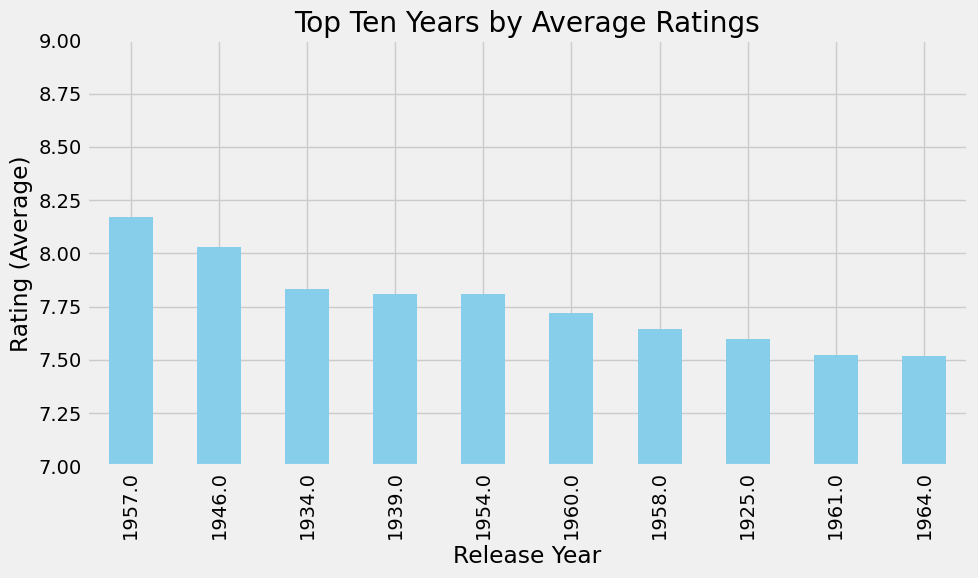

In [21]:
plt.style.use('fivethirtyeight')
top_ten_highest_imdb_rating_years = highest_imdb_rating_years.head(10)
plt.figure(figsize=(10,6))
ax = top_ten_highest_imdb_rating_years.plot(kind='bar', color='skyblue')
# To restrict the x-axis to make the Gross differences more noticeable:
plt.ylim(round(top_ten_highest_imdb_rating_years.values.min()-0.5), round(top_ten_highest_imdb_rating_years.values.max()+0.5))
ax.set_xticks(range(len(top_ten_highest_imdb_rating_years)))
ax.set_xticklabels(top_ten_highest_imdb_rating_years.index)
plt.ylabel("Rating (Average)")
plt.xlabel("Release Year")
plt.title("Top Ten Years by Average Ratings")
plt.tight_layout()  # Adjust layout for better label visibility
plt.show()

c:\Users\Chaymae\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.

c:\Users\Chaymae\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.



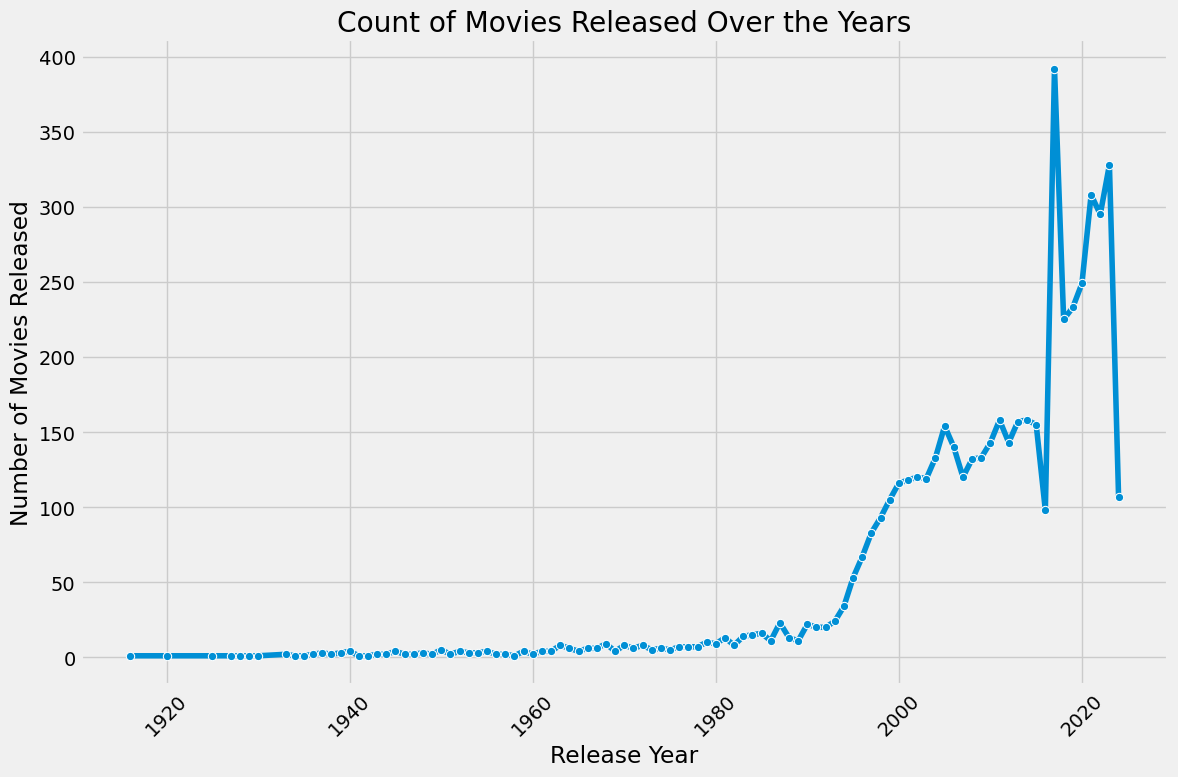

In [24]:
data['release_year'] = pd.to_datetime(data['release_date']).dt.year

# Count the number of movies released each year
movie_counts_by_year = data['release_year'].value_counts().sort_index()

# Plotting the count of movies per year
plt.figure(figsize=(12, 8))
sns.lineplot(x=movie_counts_by_year.index, y=movie_counts_by_year.values, marker='o')
plt.title('Count of Movies Released Over the Years')
plt.xlabel('Release Year')
plt.ylabel('Number of Movies Released')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

<Figure size 1200x600 with 0 Axes>

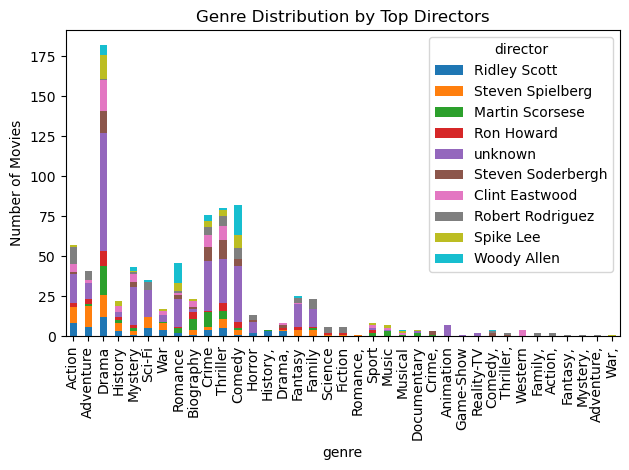

In [3]:
# Calculate the total number of movies directed by each director
director_movie_count = data['director_name'].value_counts()

# Select the top directors (e.g., top 10)
top_directors = director_movie_count.head(10).index
# Filter the data for only the movies directed by the top directors
data_top_directors = data[data['director_name'].isin(top_directors)]
# Create a dictionary to store the frequency of each genre for each top director
genre_director_counts = {}
# Iterating over each row to count the frequency of each genre for each top director
for index, row in data_top_directors.iterrows():
    director = row['director_name']
    genres = row['genres'].split()  # Splitting genres by space
    for genre in genres:
        if genre != 'unknown':  # Exclude 'unknown' genre
            if director in genre_director_counts:
                if genre in genre_director_counts[director]:
                    genre_director_counts[director][genre] += 1
                else:
                    genre_director_counts[director][genre] = 1
            else:
                genre_director_counts[director] = {genre: 1}

# Converting the dictionary to a DataFrame for easier manipulation
genre_director_distribution = pd.DataFrame(genre_director_counts).fillna(0)
# Plotting the stacked bar chart for genre distribution by top directors
plt.figure(figsize=(12, 6))  # Adjust the figure size
genre_director_distribution.plot(kind='bar', stacked=True)
plt.title('Genre Distribution by Top Directors')
plt.xlabel('genre')
plt.ylabel('Number of Movies')
plt.legend(title='director')
plt.tight_layout()  # Adjust layout to prevent clipping of labels
plt.show()